## Train and save the models 

In [2]:
import os
import torch
from Models import *
from utils import *
os.environ['KMP_DUPLICATE_LIB_OK'] = "True"

In [3]:
def train_FactorVAE(batch_size=32, feature_size=143, stock_size=100, latent_size=64, factor_size=32, 
                    time_span=20, gru_input_size=64, hidden_size=64, lr=1e-4, epochs=20):
    """Train Factor VAE and save the model"""
    device = try_gpu()
    model = FactorVAE(characteristic_size=feature_size, stock_size=stock_size, latent_size=latent_size, factor_size=factor_size, 
                           time_span=time_span, gru_input_size=gru_input_size, hidden_size=hidden_size).to(device)
    features_train, returns_train = get_dataset("train")
    features_eval,  returns_eval  = get_dataset("eval")
    train_dl = get_dataloader_factorVAE(features_train, returns_train, device, batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model = train_factorVAE(train_dl, model, optimizer, epochs, features_train, returns_train, features_eval, returns_eval, repeat=5)
    torch.save(model, "../models/FactorVAE.pth")
    return model

def train_Transformer(dim_attn=40, dim_val=64, input_size=143, dec_seq_len=5, output_seq_len=1, n_encoder_layers=3, 
                      n_decoder_layers=3, n_heads=3, lr=1e-3, epochs=3, batch_size=64):
    """Train Transformer and save the model"""
    device = try_gpu()
    model = Transformer(dim_val, dim_attn, input_size, dec_seq_len, output_seq_len, n_decoder_layers, n_encoder_layers, n_heads).to(device)
    features_train, returns_train = dataset_dim_convertion_4to3(*get_dataset("train"))
    features_eval,  returns_eval  = dataset_dim_convertion_4to3(*get_dataset("eval"))
    train_dl = get_dataloader_factorVAE(features_train, returns_train, device, batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss = nn.MSELoss()
    model = train_modelTS(train_dl, model, optimizer, loss, device, epochs, features_eval, returns_eval, "Transformer", 1024)
    torch.save(model, "../models/Transformer.pth")
    return model

def train_LSTM(batch_size=128, feature_size=143, hidden_size=64, num_layers = 3, lr=1e-5, epochs=15):
    """Train LSTM and save the model"""
    device = try_gpu()
    model = LSTM(feature_size, hidden_size, num_layers=num_layers).to(device)
    features_train, returns_train = dataset_dim_convertion_4to3(*get_dataset("train"))
    features_eval,  returns_eval  = dataset_dim_convertion_4to3(*get_dataset("eval"))
    train_dl = get_dataloader_factorVAE(features_train, returns_train, device, batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss = nn.MSELoss()
    model = train_modelTS(train_dl, model, optimizer, loss, device, epochs, 
                          features_eval, returns_eval, "LSTM", 1024)
    torch.save(model, "../models/LSTM.pth")
    return model

def train_PatchTST(batch_size=128, feature_size=143, hidden_size=64, num_layers = 3, lr=1e-5, epochs=15):
    """Train LSTM and save the model"""
    device = try_gpu()
    model = Model().to(device)
    features_train, returns_train = dataset_dim_convertion_4to3(*get_dataset("train"))
    features_eval,  returns_eval  = dataset_dim_convertion_4to3(*get_dataset("eval"))
    train_dl = get_dataloader_factorVAE(features_train, returns_train, device, batch_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss = nn.MSELoss()
    model = train_modelTS(train_dl, model, optimizer, loss, device, epochs, 
                          features_eval, returns_eval, "LSTM", 1024)
    torch.save(model, "../models/PatchTST.pth")
    return model


## Part-1 Training Factor VAE

In [ ]:
Factor_VAE = train_FactorVAE()

Total step: 1865
Time span: 20
Stock size: 100
Feature size: 143
Total step: 465
Time span: 20
Stock size: 100
Feature size: 143
sadasdsadsadas
====epoch:0====


KeyboardInterrupt: 

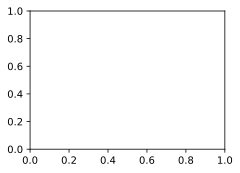

In [4]:
## Part-2 Training PatchTST
PatchTST = train_PatchTST()

## Part-2 Training Transformer

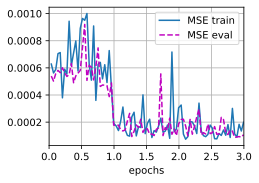

In [3]:
transformer = train_Transformer()

## Part-3 Training LSTM

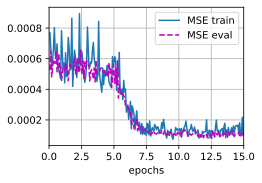

In [6]:
lstm = train_LSTM()